# LDA
Condider Fisher's iris data.

In [29]:
# Import the necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True).frame
iris_features = iris.drop(columns='target')
iris_target_names = load_iris().target_names
iris['target'] = iris['target'].map({0: iris_target_names[0], 1: iris_target_names[1], 2: iris_target_names[2]})
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


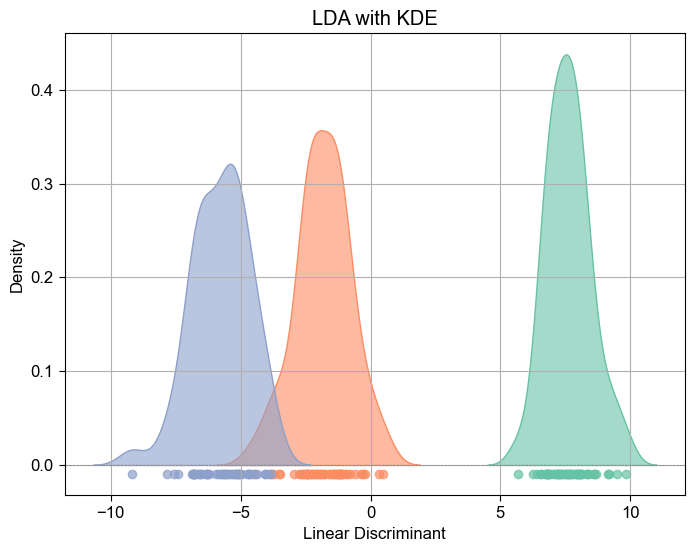

array([[ 8.06179978],
       [ 7.12868772],
       [ 7.48982797],
       [ 6.81320057],
       [ 8.13230933],
       [ 7.70194674],
       [ 7.21261762],
       [ 7.60529355],
       [ 6.56055159],
       [ 7.34305989],
       [ 8.39738652],
       [ 7.21929685],
       [ 7.32679599],
       [ 7.57247066],
       [ 9.849843  ],
       [ 9.1582389 ],
       [ 8.58243141],
       [ 7.78075375],
       [ 8.07835876],
       [ 8.02097451],
       [ 7.49680227],
       [ 7.58648117],
       [ 8.68104293],
       [ 6.25140358],
       [ 6.55893336],
       [ 6.77138315],
       [ 6.82308032],
       [ 7.92461638],
       [ 7.99129024],
       [ 6.82946447],
       [ 6.75895493],
       [ 7.37495254],
       [ 9.12634625],
       [ 9.46768199],
       [ 7.06201386],
       [ 7.95876243],
       [ 8.61367201],
       [ 8.33041759],
       [ 6.93412007],
       [ 7.68823131],
       [ 7.91793715],
       [ 5.66188065],
       [ 7.24101468],
       [ 6.41443556],
       [ 6.85944381],
       [ 6

In [ ]:
import pyEDAkit as kit
kit.LDA(iris_features, iris['target'], 2)

Consider Fisher’s iris data, Repeat the example [2.6?] in the book and show the data in 1–D, along with the kernel density estimate

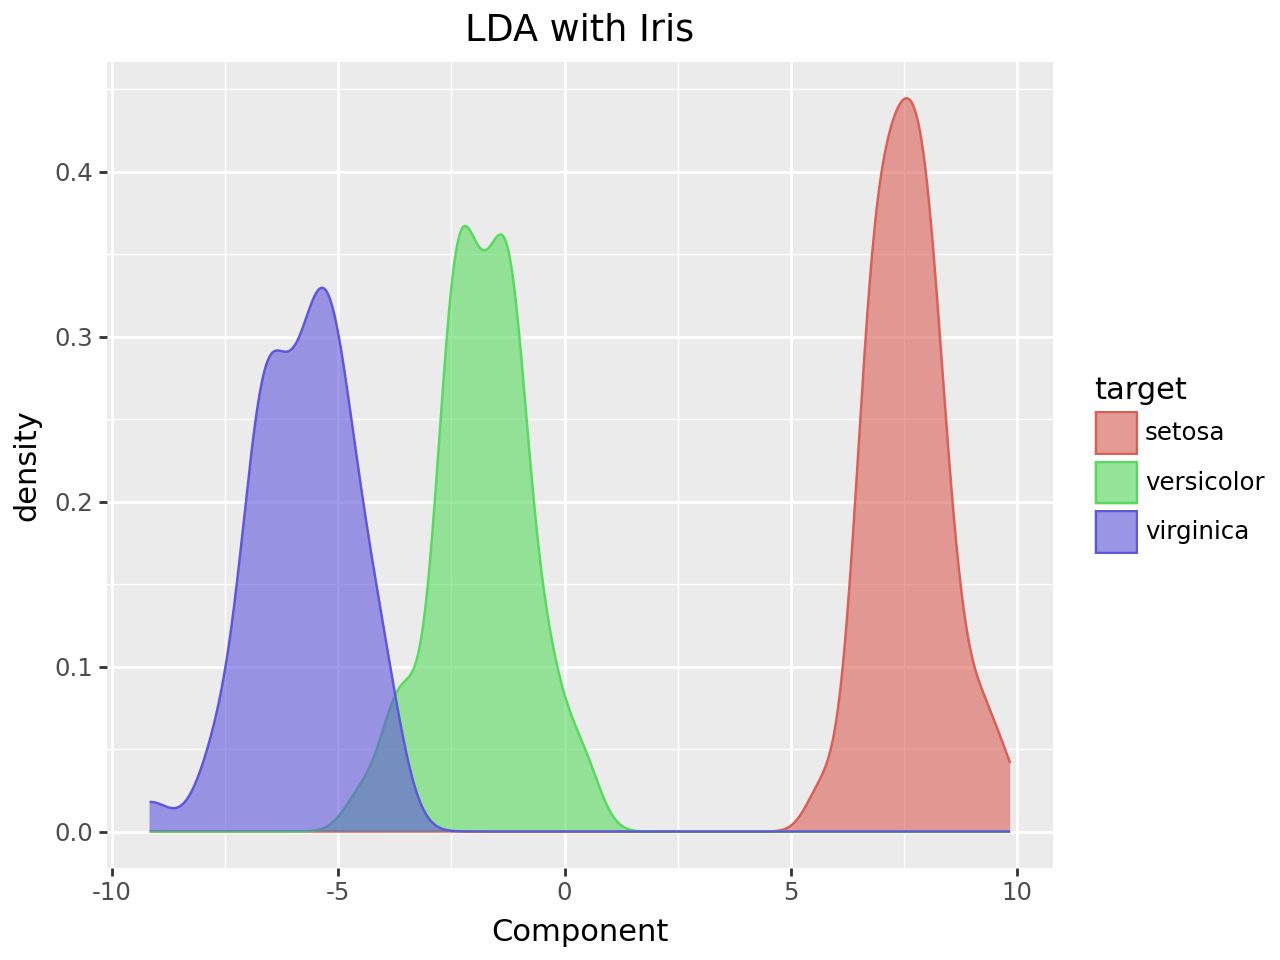

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from plotnine import *
# lda with iris
lda = LDA(n_components=1)
Z = lda.fit_transform(iris_features, iris_target)
(
  ggplot(
    pd.DataFrame({"Component": Z.flatten(), "target": iris_target}),
    aes(x = 'Component', color = 'target', fill = "target")
  )
  + geom_density(alpha = 0.6)
  + ggtitle("LDA with Iris")
)


Discuss how good the mappings are for each case:

a) Taking two classes at a time, i.e., [setosa, versicolor]; [versicolor, virginica];  [virginica,  setosa].

In [56]:
import plotnine as gg
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import numpy as np

def _check_plotnine_grid(plots_list, figsize):
    if not type(plots_list) == list:
        raise ValueError('Input plots_list is not a list')
    if (not type(figsize) == tuple) or (not len(figsize) == 2):
        raise ValueError('Input figsize should be a tuple of length 2')


def plotnine_grid(plots_list, row=None, col=1, height=None, width=None, dpi=500, ratio=None, pixels=10000,
                  figsize=(12, 8)):
    _check_plotnine_grid(plots_list, figsize)  # Check the input

    # Assign values that have not been provided based on others. In the end, height and width should be provided.
    if row is None:
      row = len(plots_list)

    if ratio is None:
      ratio = 1.5 * col / row

    if height is None and width is not None:
      height = ratio * width

    if height is not None and width is None:
      width = height / ratio

    if height is None and width is None:
      area = pixels / dpi
      width = np.sqrt(area/ratio)
      height = ratio * width

    # Do actual subplot creation and plot output.
    i = 1
    fig = plt.figure(figsize=figsize)
    plt.autoscale(tight=True)
    for image_sel in plots_list:  # image_sel = plots_list[i]
      image_sel.save('image' + str(i) + '.png', height=height, width=width, dpi=500, verbose=False)
    fig.add_subplot(row, col, i)
    plt.imshow(img.imread('image' + str(i) + '.png'), aspect='auto')
    fig.tight_layout()
    fig.get_axes()[i-1].axis('off')
    i = i + 1
    os.unlink('image' + str(i - 1) + '.png')  # os.unlink is basically os.remove but in some cases quicker
    fig.patch.set_visible(False)
    return fig

AttributeError: 'ggplot' object has no attribute '_create_figure'

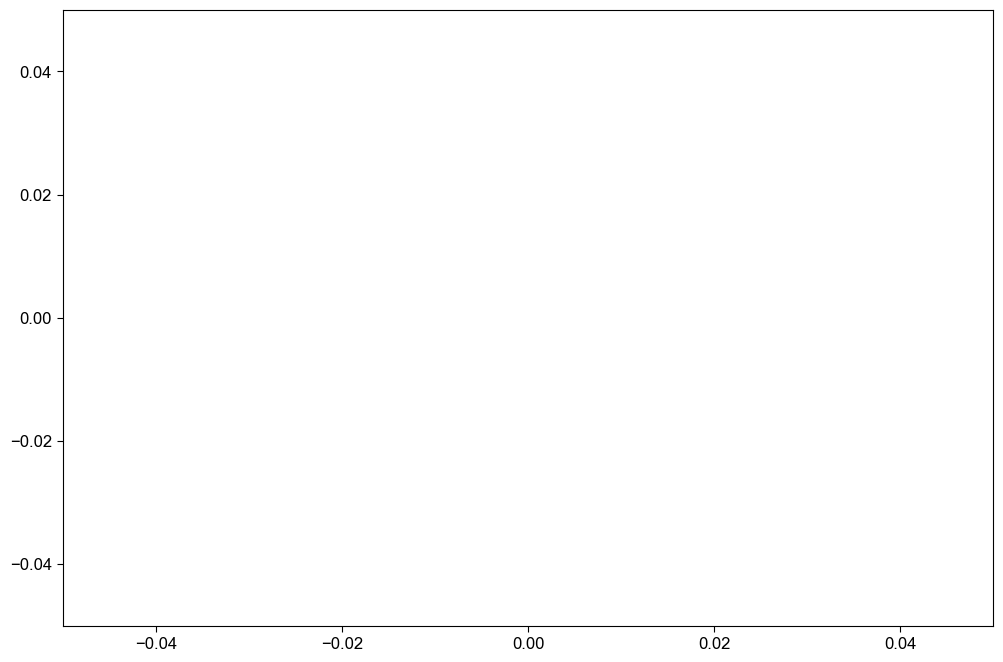

In [57]:
from itertools import combinations
plots = []
for feature1, feature2 in combinations(iris_features.columns, 2):
  lda = LDA(n_components=1)
  Z = lda.fit_transform(iris_features[[feature1, feature2]], iris_target)
  plot = (
    ggplot(
      pd.DataFrame({"Component": Z.flatten(), "target": iris_target}),
      aes(x = 'Component', color = 'target', fill = "target")
    )
    + geom_density(alpha = 0.6)
    + ggtitle(f"LDA with Iris: {feature1} and {feature2}")
  )
  plots.append(plot)
plotnine_grid(plots)